# Exploratory Data Analysis & Financial Metrics

## Transforming Prices into Investment Insights

This notebook performs exploratory data analysis on our collected ETF data. We'll transform raw price data into analyzable return series, calculate key financial metrics, and visualize patterns to understand asset behavior and risk characteristics.

### Analysis Steps

1. **Data Loading**: Import collected price data from CSV
2. **Returns Calculation**: Compute daily simple and logarithmic returns  
3. **Cumulative Performance**: Track growth of $1 investment over time
4. **Correlation Analysis**: Measure diversification benefits between assets
5. **Enhanced Analysis**: Rolling statistics, distribution analysis, and risk metrics

### Key Outputs

- Daily return series for IVV, IEF, GLD
- Correlation and covariance matrices
- Rolling volatility and correlation plots
- Distribution statistics (skewness, kurtosis, normality tests)
- Comprehensive risk metrics (Sharpe ratio, drawdowns, VaR)

*Note: All calculations use adjusted closing prices to account for dividends and splits.*


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

tickers = ["IVV", "IEF", "GLD"] 
path = '../data/sample_data.csv'
data = pd.read_csv(path, index_col=0, parse_dates=True, header=[0, 1])
price = pd.DataFrame({t: data[t]['Close'] for t in tickers})

print("First 5 rows:")
print(price.head())


First 5 rows:
                  IVV        IEF        GLD
Date                                       
2005-01-03  81.935257  48.867405  43.020000
2005-01-04  80.948959  48.563084  42.740002
2005-01-05  80.459244  48.643501  42.669998
2005-01-06  80.785736  48.689377  42.150002
2005-01-07  80.636040  48.649223  41.840000


### Visualizing returns

Before calculating returns, let's visualize price levels to get a sense of how these assets behave.

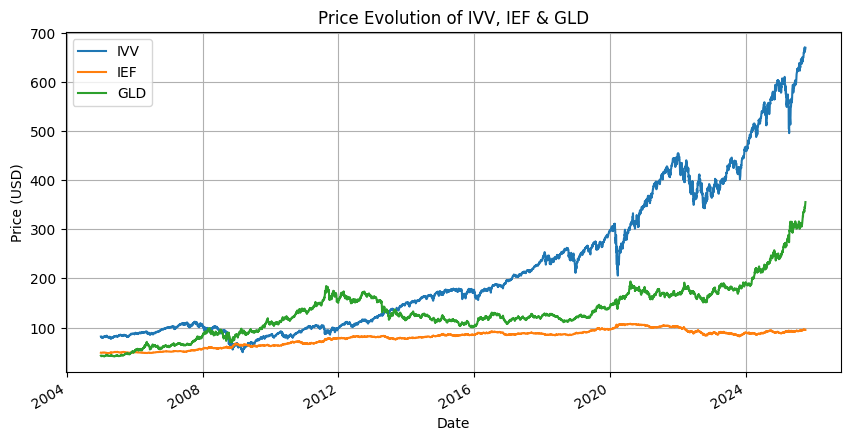

In [2]:
# Plotting the price evolution

price.plot(figsize=(10,5), title="Price Evolution of IVV, IEF & GLD")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

This graph represents the raw price process $P_t$.

Let's interpret what this graph is telling us about each of the assets.

· IVV: It shows long-term growth and strong cycles each couple of years. The price has increased greatly in the last 5 years.

· IEF: The growth is quite slow and smooth. This also an indicative of lower volatility.

· GLD: Gold is often named a safe-haven asset. It is resistant to crises and inflation.

We have an ordered sequence of daily closing prices for each ETF we have chosen on "tickers". We will be analyzing stationarity and volatility.

### Calculating daily returns

We will use the formula $r_t = P_t / P_{t-1}-1 = \frac{P_t -P_{t-1}}{P_{t-1}}.$ This is interpretable as "the price rose by x% compared to the previous day". To calculate accumulated wealth: $(1+r_1)(1+r_2)\cdots -1$

In [3]:
# Daily returns 

simple_returns = price.pct_change().dropna()
print("First 5 rows:")
print(simple_returns.head())

First 5 rows:
                 IVV       IEF       GLD
Date                                    
2005-01-04 -0.012038 -0.006227 -0.006509
2005-01-05 -0.006050  0.001656 -0.001638
2005-01-06  0.004058  0.000943 -0.012186
2005-01-07 -0.001853 -0.000825 -0.007355
2005-01-10  0.005062 -0.000118  0.002629


### Calculating Logarithmic returns
These are often used for mathematical/statistical analysis. The formula is:

$ l_t = ln(\dfrac{P_t}{P_{t-1}}) $

Log-returns are additive in time, which means the sum of log-returns equals the log of composed return.


In [4]:
# Logarithmic returns 

log_returns = np.log(price / price.shift(1)).dropna()  # ln(P_t / P_{t-1})
print("Logarithmic returns calculated successfully.")
print("First 5 rows:")
print(log_returns.head())

Logarithmic returns calculated successfully.
First 5 rows:
                 IVV       IEF       GLD
Date                                    
2005-01-04 -0.012111 -0.006247 -0.006530
2005-01-05 -0.006068  0.001655 -0.001639
2005-01-06  0.004050  0.000943 -0.012261
2005-01-07 -0.001855 -0.000825 -0.007382
2005-01-10  0.005049 -0.000118  0.002626


### Cumulative return

We will check the accumulated value of an investment of $1.

In [5]:

# By columns, evolution of $1 -> cumulative value

cum_simple = (1 + simple_returns).cumprod()  
print(cum_simple.head())

# Another way; index of normalized price (P_t / P_0)

cum_price_index = price / price.iloc[0]      
print("\nNormalized price index calculated successfully.")
print(cum_price_index.head())

                 IVV       IEF       GLD
Date                                    
2005-01-04  0.987962  0.993773  0.993491
2005-01-05  0.981986  0.995418  0.991864
2005-01-06  0.985970  0.996357  0.979777
2005-01-07  0.984143  0.995535  0.972571
2005-01-10  0.989125  0.995418  0.975128

Normalized price index calculated successfully.
                 IVV       IEF       GLD
Date                                    
2005-01-03  1.000000  1.000000  1.000000
2005-01-04  0.987962  0.993773  0.993491
2005-01-05  0.981986  0.995418  0.991864
2005-01-06  0.985970  0.996357  0.979777
2005-01-07  0.984143  0.995535  0.972571


Another way of calculating it is using the mathematical property. We will plot the results to observe the growth factor.

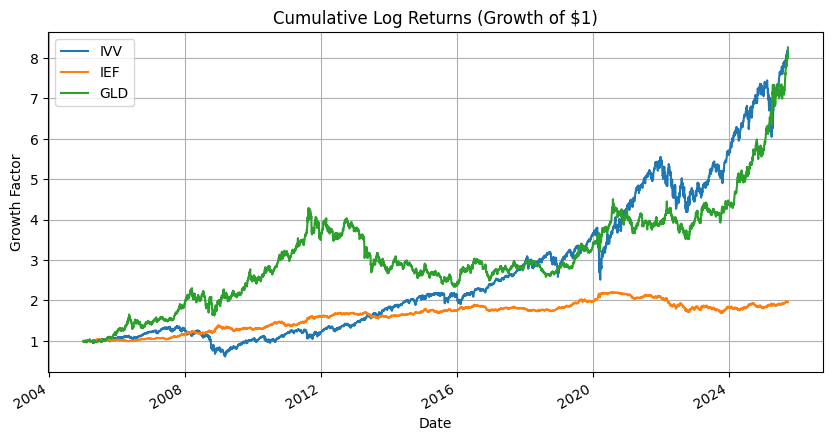

In [6]:
# Calculate cumulative log returns 

cumulative_returns = np.exp(log_returns.cumsum())

cumulative_returns.plot(figsize=(10,5), title="Cumulative Log Returns (Growth of $1)")
plt.xlabel("Date")
plt.ylabel("Growth Factor")
plt.grid(True)
plt.show()

### Interpretation

The curves indicate how an investment of $1 in 2005 would have evolved. The shapes of the curves represent compounding effects and volatility drag. 

Comparing the curves, it is shown that in the long run, IVV and GLD performed about the same, showing a similar behaviour in the last decade.

IEF, on the contrary, performed a steady growth, several times smaller than the other two.

### Correlation and Covariance

Now we will study the underlying diversification potential and correlations between the log returns.

In [7]:
# Correlation and covariance 

corr = log_returns.corr()
cov = log_returns.cov()

print("Correlation matrix:")
print(corr)

print("\nCovariance matrix:")
print(cov)


Correlation matrix:
          IVV       IEF       GLD
IVV  1.000000 -0.300808  0.054146
IEF -0.300808  1.000000  0.210315
GLD  0.054146  0.210315  1.000000

Covariance matrix:
          IVV       IEF       GLD
IVV  0.000144 -0.000015  0.000007
IEF -0.000015  0.000018  0.000010
GLD  0.000007  0.000010  0.000123


## Rolling Statistics and Risk Metrics

Now we'll add three key enhancements to deepen our understanding before moving to full statistical analysis:

### 1. Rolling Statistics

Financial time series often exhibit **time-varying properties**. Rolling statistics help us visualize:
- How volatility changes over time (volatility clustering)
- How correlations evolve (important for diversification)
- Market regimes and structural breaks

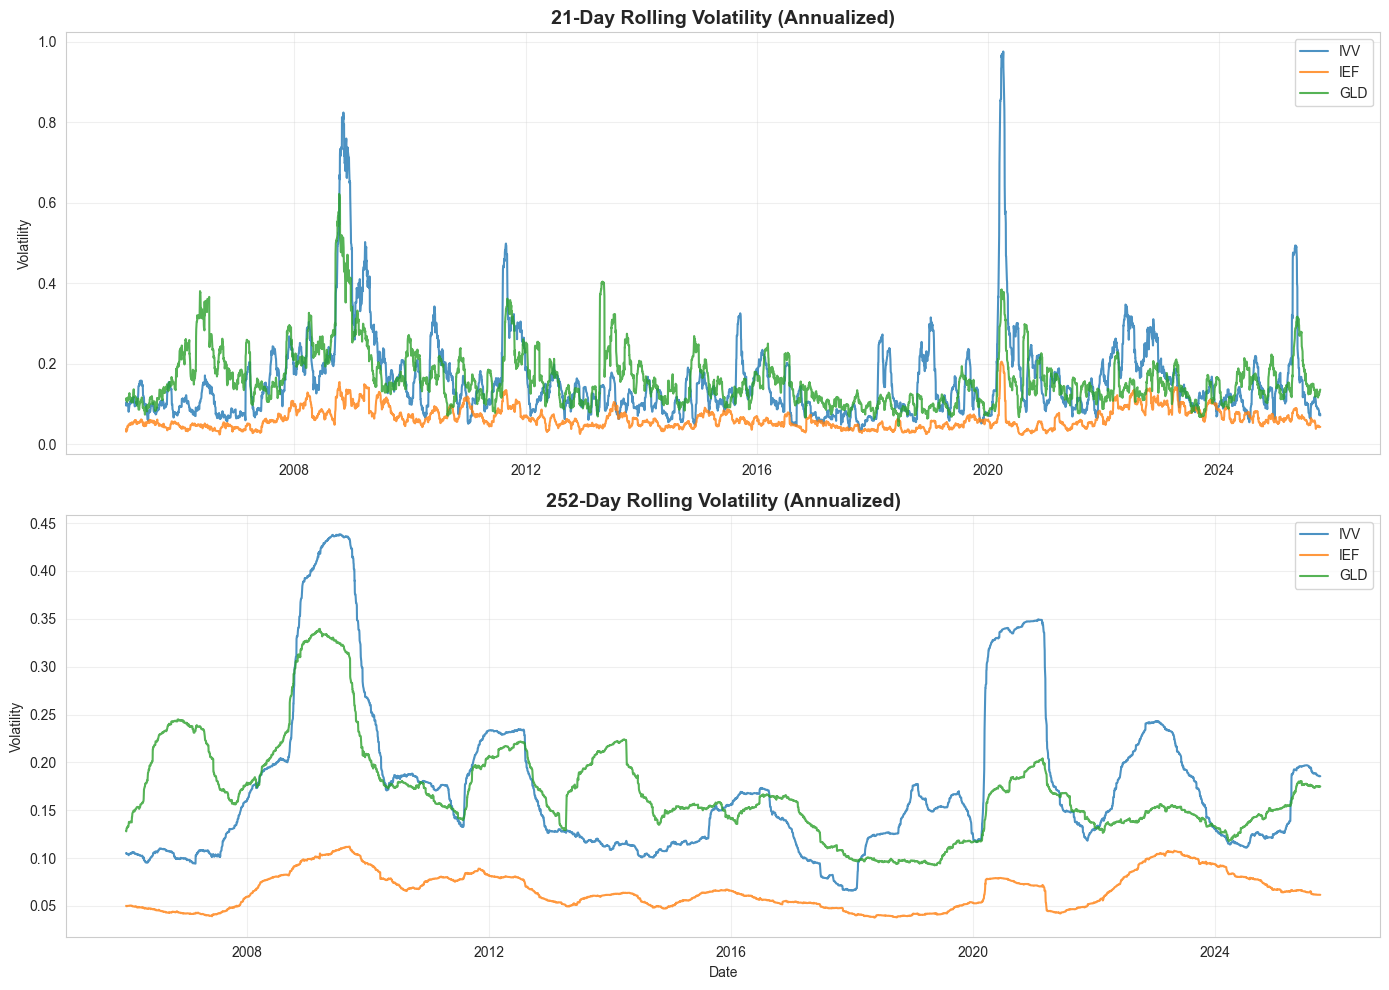

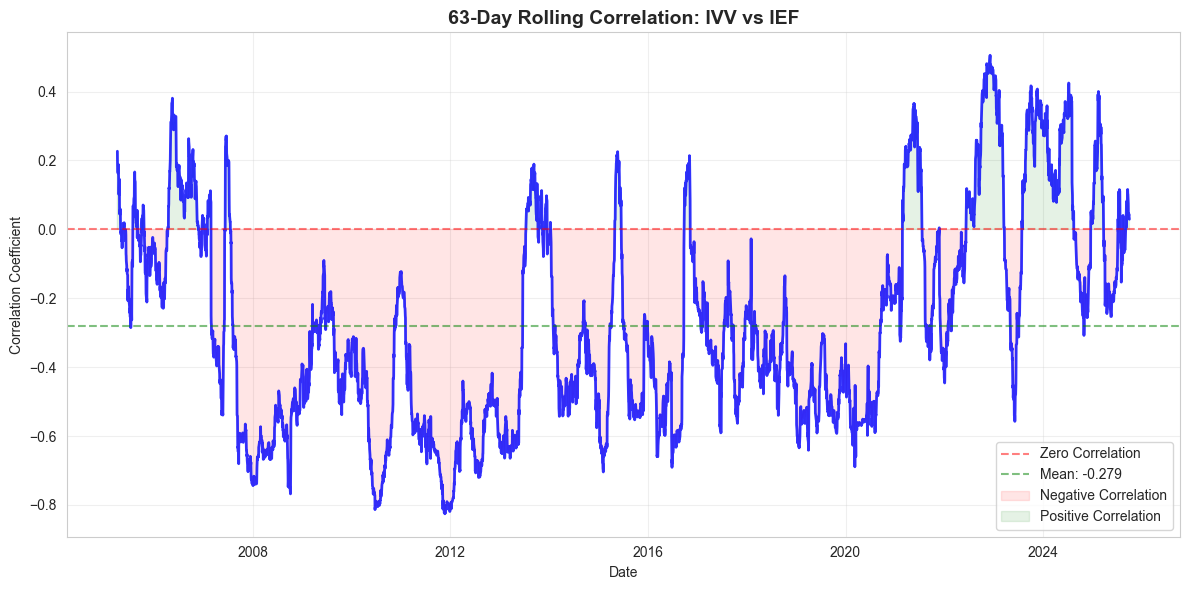

ROLLING CORRELATION SUMMARY (IVV vs IEF):
Window: 63 days
Mean correlation: -0.2794
Std deviation: 0.3072
Minimum: -0.8257
Maximum: 0.5055
% Negative days: 78.6%
% Positive days: 21.4%


In [8]:

# Import seaborn for better visualizations
import seaborn as sns
sns.set_style("whitegrid")

# 1.1 Calculate rolling volatility (standard deviation)
# Using 21-day window (approximately 1 trading month) and 252 days (trading year)
window_short = 21  # Short-term: 1 month
window_long = 252  # Long-term: 1 year

# Calculate rolling annualized volatility
rolling_vol_short = log_returns.rolling(window=window_short).std() * np.sqrt(252)
rolling_vol_long = log_returns.rolling(window=window_long).std() * np.sqrt(252)

# Plot rolling volatility
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot short-term rolling volatility
for ticker in tickers:
    axes[0].plot(rolling_vol_short.index, rolling_vol_short[ticker], 
                label=ticker, linewidth=1.5, alpha=0.8)
axes[0].set_title(f'{window_short}-Day Rolling Volatility (Annualized)', 
                 fontsize=14, fontweight='bold')
axes[0].set_ylabel('Volatility')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot long-term rolling volatility
for ticker in tickers:
    axes[1].plot(rolling_vol_long.index, rolling_vol_long[ticker], 
                label=ticker, linewidth=1.5, alpha=0.8)
axes[1].set_title(f'{window_long}-Day Rolling Volatility (Annualized)', 
                 fontsize=14, fontweight='bold')
axes[1].set_ylabel('Volatility')
axes[1].set_xlabel('Date')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 1.2 Calculate rolling correlation between IVV and IEF (stock-bond correlation)
# This is crucial for understanding diversification benefits over time
rolling_corr_window = 63  # Approximately 3 months
rolling_corr = log_returns['IVV'].rolling(window=rolling_corr_window).corr(log_returns['IEF'])

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr, 'b-', linewidth=2, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Zero Correlation')
plt.axhline(y=rolling_corr.mean(), color='g', linestyle='--', alpha=0.5, 
           label=f'Mean: {rolling_corr.mean():.3f}')
plt.fill_between(rolling_corr.index, rolling_corr, 0, 
                where=(rolling_corr < 0), color='red', alpha=0.1, label='Negative Correlation')
plt.fill_between(rolling_corr.index, rolling_corr, 0, 
                where=(rolling_corr >= 0), color='green', alpha=0.1, label='Positive Correlation')
plt.title(f'{rolling_corr_window}-Day Rolling Correlation: IVV vs IEF', 
         fontsize=14, fontweight='bold')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Date')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics for rolling correlation
print("ROLLING CORRELATION SUMMARY (IVV vs IEF):")
print("=" * 50)
print(f"Window: {rolling_corr_window} days")
print(f"Mean correlation: {rolling_corr.mean():.4f}")
print(f"Std deviation: {rolling_corr.std():.4f}")
print(f"Minimum: {rolling_corr.min():.4f}")
print(f"Maximum: {rolling_corr.max():.4f}")
print(f"% Negative days: {(rolling_corr < 0).sum() / len(rolling_corr.dropna()) * 100:.1f}%")
print(f"% Positive days: {(rolling_corr >= 0).sum() / len(rolling_corr.dropna()) * 100:.1f}%")

### 2. Distribution Analysis

Understanding the **shape of return distributions** is critical for risk management:
- **Skewness**: Measures asymmetry (negative = more extreme losses)
- **Kurtosis**: Measures tail thickness (high = more extreme events)
- **Jarque-Bera test**: Tests if returns follow normal distribution

DISTRIBUTION ANALYSIS OF ETF RETURNS

IVV:
  Mean return: 0.000403
  Std deviation: 0.011982
  Skewness: -0.4649 (Negative skew)
  Kurtosis: 12.4859 (Fat tails)
  Jarque-Bera test: Stat=34082.94, p-value=0.000000
  Normal distribution? NO

IEF:
  Mean return: 0.000129
  Std deviation: 0.004294
  Skewness: 0.1100 (Positive skew)
  Kurtosis: 2.6595 (Fat tails)
  Jarque-Bera test: Stat=1548.35, p-value=0.000000
  Normal distribution? NO

GLD:
  Mean return: 0.000405
  Std deviation: 0.011076
  Skewness: -0.2990 (Negative skew)
  Kurtosis: 5.8333 (Fat tails)
  Jarque-Bera test: Stat=7475.80, p-value=0.000000
  Normal distribution? NO

DISTRIBUTION SUMMARY TABLE
Ticker     Mean      Std  Skewness  Kurtosis  JB_Statistic  JB_p-value  Is_Normal
   IVV 0.000403 0.011982 -0.464891 12.485941  34082.935518         0.0      False
   IEF 0.000129 0.004294  0.110049  2.659536   1548.349554         0.0      False
   GLD 0.000405 0.011076 -0.298999  5.833272   7475.799027         0.0      False


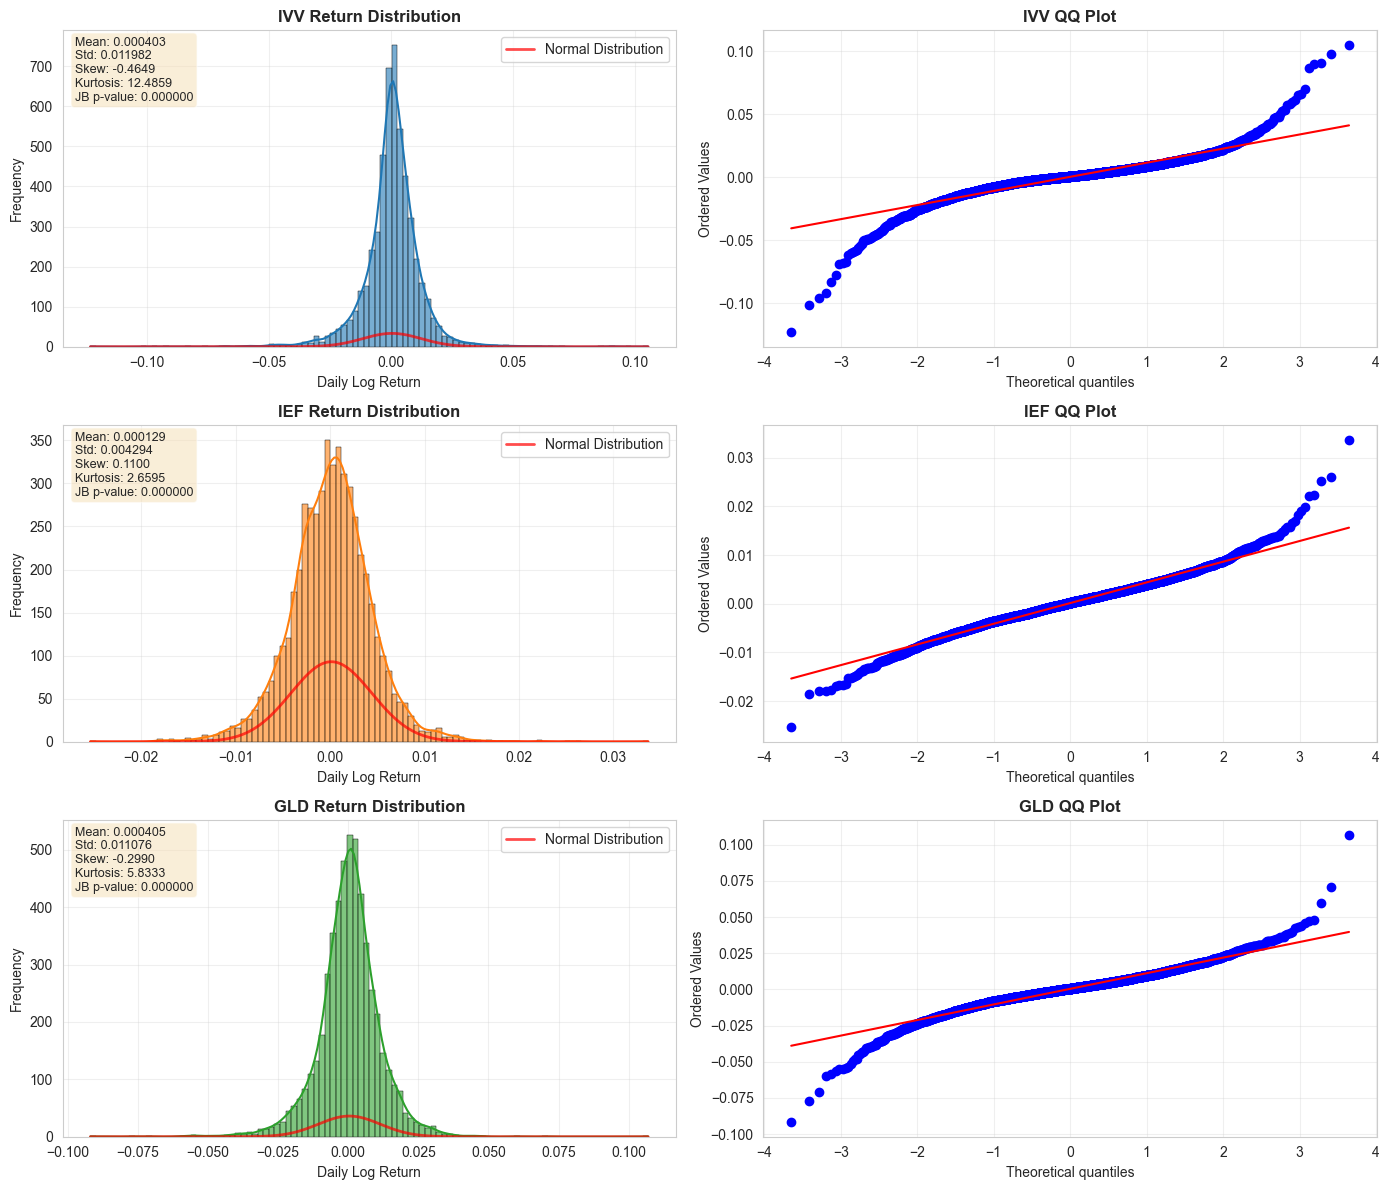


INTERPRETATION OF DISTRIBUTION ANALYSIS

1. SKEWNESS:
   - Negative skewness indicates more frequent extreme negative returns
   - Positive skewness indicates more frequent extreme positive returns
   - Ideal: Slightly positive or zero skew

2. KURTOSIS (Excess):
   - > 0: Fat tails (more extreme events than normal distribution)
   - < 0: Thin tails (fewer extreme events)
   - Normal distribution has excess kurtosis = 0

3. JARQUE-BERA TEST:
   - Null hypothesis: Returns are normally distributed
   - p-value > 0.05: Fail to reject null (normal distribution)
   - p-value <= 0.05: Reject null (NOT normal distribution)

4. IMPLICATIONS:
   - Non-normal distributions affect risk measures like VaR
   - Fat tails mean extreme events occur more frequently than expected
   - Negative skew means downside risk is greater than upside potential


In [9]:

# Import statistical functions
from scipy import stats
from scipy.stats import jarque_bera, skew, kurtosis

# Create comprehensive distribution analysis
distribution_results = []

print("DISTRIBUTION ANALYSIS OF ETF RETURNS")
print("=" * 60)

for ticker in tickers:
    returns = log_returns[ticker].dropna()
    
    # Calculate distribution statistics
    mean_return = returns.mean()
    std_return = returns.std()
    skewness = skew(returns)
    kurt = kurtosis(returns)  # Excess kurtosis (normal = 0)
    
    # Jarque-Bera test for normality
    jb_stat, jb_pval = jarque_bera(returns)
    
    # Store results
    distribution_results.append({
        'Ticker': ticker,
        'Mean': mean_return,
        'Std': std_return,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'JB_Statistic': jb_stat,
        'JB_p-value': jb_pval,
        'Is_Normal': jb_pval > 0.05  # Fail to reject null hypothesis at 5% level
    })
    
    # Print individual results
    print(f"\n{ticker}:")
    print(f"  Mean return: {mean_return:.6f}")
    print(f"  Std deviation: {std_return:.6f}")
    print(f"  Skewness: {skewness:.4f} ({'Negative' if skewness < 0 else 'Positive'} skew)")
    print(f"  Kurtosis: {kurt:.4f} ({'Fat tails' if kurt > 0 else 'Thin tails'})")
    print(f"  Jarque-Bera test: Stat={jb_stat:.2f}, p-value={jb_pval:.6f}")
    print(f"  Normal distribution? {'YES' if jb_pval > 0.05 else 'NO'}")

# Create summary DataFrame
dist_df = pd.DataFrame(distribution_results)
print("\n" + "=" * 60)
print("DISTRIBUTION SUMMARY TABLE")
print("=" * 60)
print(dist_df.to_string(index=False))

# Visualize distributions with histograms and KDE
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

for idx, ticker in enumerate(tickers):
    returns = log_returns[ticker].dropna()
    
    # Histogram with KDE
    sns.histplot(returns, kde=True, ax=axes[idx, 0], bins=100, 
                color=f'C{idx}', edgecolor='black', alpha=0.6)
    
    # Add normal distribution overlay for comparison
    x = np.linspace(returns.min(), returns.max(), 1000)
    normal_pdf = stats.norm.pdf(x, returns.mean(), returns.std())
    axes[idx, 0].plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.7, label='Normal Distribution')
    
    axes[idx, 0].set_title(f'{ticker} Return Distribution', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel('Daily Log Return')
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].legend()
    axes[idx, 0].grid(True, alpha=0.3)
    
    # Add distribution statistics as text box
    stats_text = f"Mean: {returns.mean():.6f}\n"
    stats_text += f"Std: {returns.std():.6f}\n"
    stats_text += f"Skew: {skew(returns):.4f}\n"
    stats_text += f"Kurtosis: {kurtosis(returns):.4f}\n"
    stats_text += f"JB p-value: {jarque_bera(returns)[1]:.6f}"
    axes[idx, 0].text(0.02, 0.98, stats_text, transform=axes[idx, 0].transAxes,
                     fontsize=9, verticalalignment='top',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # QQ Plot for normality check
    stats.probplot(returns, dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'{ticker} QQ Plot', fontsize=12, fontweight='bold')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation of distribution results
print("\n" + "=" * 60)
print("INTERPRETATION OF DISTRIBUTION ANALYSIS")
print("=" * 60)
print("\n1. SKEWNESS:")
print("   - Negative skewness indicates more frequent extreme negative returns")
print("   - Positive skewness indicates more frequent extreme positive returns")
print("   - Ideal: Slightly positive or zero skew")

print("\n2. KURTOSIS (Excess):")
print("   - > 0: Fat tails (more extreme events than normal distribution)")
print("   - < 0: Thin tails (fewer extreme events)")
print("   - Normal distribution has excess kurtosis = 0")

print("\n3. JARQUE-BERA TEST:")
print("   - Null hypothesis: Returns are normally distributed")
print("   - p-value > 0.05: Fail to reject null (normal distribution)")
print("   - p-value <= 0.05: Reject null (NOT normal distribution)")

print("\n4. IMPLICATIONS:")
print("   - Non-normal distributions affect risk measures like VaR")
print("   - Fat tails mean extreme events occur more frequently than expected")
print("   - Negative skew means downside risk is greater than upside potential")

### 3. Risk Metrics

**Sharpe Ratio** is the most widely used risk-adjusted performance measure:
$$\text{Sharpe Ratio} = \frac{E[R] - R_f}{\sigma}$$
Where:
- $E[R]$ = Expected return
- $R_f$ = Risk-free rate
- $\sigma$ = Standard deviation of returns

SHARPE RATIO ANALYSIS
Assumptions:
- Risk-free rate: 2% annual
- Trading days per year: 252

IVV:
  Sharpe Ratio: 0.428
  Interpretation: Acceptable (0 - 0.5)
IEF:
  Sharpe Ratio: 0.182
  Interpretation: Acceptable (0 - 0.5)
GLD:
  Sharpe Ratio: 0.466
  Interpretation: Acceptable (0 - 0.5)


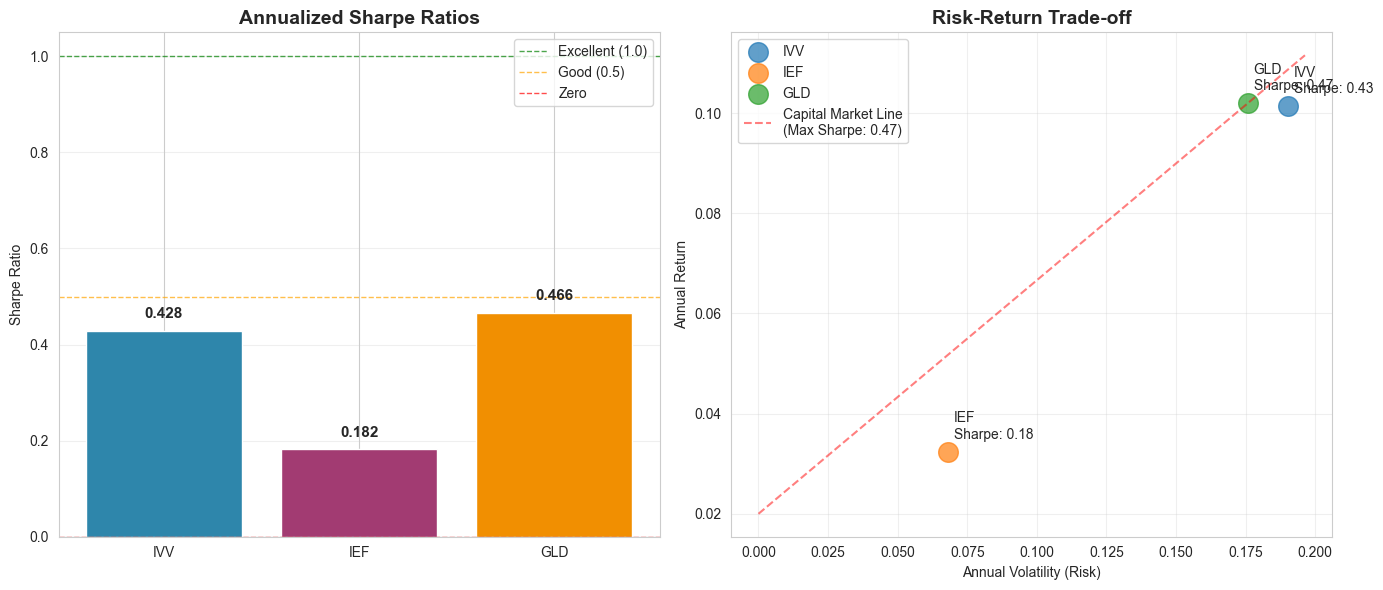


ADDITIONAL RISK METRICS

Comprehensive Risk Metrics Table:
--------------------------------------------------------------------------------
     Ann. Return  Ann. Volatility  Sharpe  Sortino  Max Drawdown  VaR 95%  \
ETF                                                                         
IVV       0.1014           0.1902  0.4281   0.5091       -0.5934  -0.0181   
IEF       0.0324           0.0682  0.1819   0.2785       -0.2471  -0.0068   
GLD       0.1020           0.1758  0.4663   0.6228       -0.4922  -0.0175   

     Return/Vol  
ETF              
IVV      0.5333  
IEF      0.4754  
GLD      0.5800  

PERFORMANCE RANKINGS

1. Highest Sharpe Ratio: GLD (0.466)
2. Lowest Volatility: IEF (0.068)
3. Highest Return: GLD (0.102)
4. Best Risk-Adjusted Return (Return/Vol): GLD (0.580)
5. Worst Maximum Drawdown: IVV (-0.593)

✓ Risk metrics saved to '../data/risk_metrics_summary.csv'
✓ Ready for advanced statistical analysis in next notebook! 🚀


In [10]:

def calculate_sharpe_ratio(returns, risk_free_rate=0.02, periods=252):
    """
    Calculate annualized Sharpe ratio for a return series.
    
    Parameters:
    -----------
    returns : pd.Series
        Daily return series
    risk_free_rate : float
        Annual risk-free rate (default 2%)
    periods : int
        Number of trading periods in a year (default 252)
        
    Returns:
    --------
    sharpe_ratio : float
        Annualized Sharpe ratio
    """
    # Calculate excess returns (returns above risk-free rate)
    excess_returns = returns - risk_free_rate/periods
    
    # Annualize mean and standard deviation
    annualized_mean = excess_returns.mean() * periods
    annualized_std = returns.std() * np.sqrt(periods)
    
    # Calculate Sharpe ratio
    if annualized_std > 0:
        sharpe_ratio = annualized_mean / annualized_std
    else:
        sharpe_ratio = np.nan
    
    return sharpe_ratio

# Calculate Sharpe ratios for each ETF
sharpe_results = {}

print("SHARPE RATIO ANALYSIS")
print("=" * 50)
print(f"Assumptions:\n- Risk-free rate: 2% annual\n- Trading days per year: 252\n")

for ticker in tickers:
    sharpe = calculate_sharpe_ratio(log_returns[ticker])
    sharpe_results[ticker] = sharpe
    
    # Interpret Sharpe ratio
    if sharpe > 1.0:
        interpretation = "Excellent (> 1.0)"
    elif sharpe > 0.5:
        interpretation = "Good (0.5 - 1.0)"
    elif sharpe > 0:
        interpretation = "Acceptable (0 - 0.5)"
    elif sharpe > -0.5:
        interpretation = "Poor (-0.5 - 0)"
    else:
        interpretation = "Very Poor (< -0.5)"
    
    print(f"{ticker}:")
    print(f"  Sharpe Ratio: {sharpe:.3f}")
    print(f"  Interpretation: {interpretation}")

# Compare Sharpe ratios visually
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart of Sharpe ratios
tickers_list = list(sharpe_results.keys())
sharpe_values = list(sharpe_results.values())

bars = axes[0].bar(tickers_list, sharpe_values, color=['#2E86AB', '#A23B72', '#F18F01'])
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
axes[0].axhline(y=1, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Excellent (1.0)')
axes[0].axhline(y=0.5, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='Good (0.5)')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Zero')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[0].set_title('Annualized Sharpe Ratios', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sharpe Ratio')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3, axis='y')

# Risk-Return scatter plot
for ticker in tickers:
    annual_return = log_returns[ticker].mean() * 252
    annual_volatility = log_returns[ticker].std() * np.sqrt(252)
    sharpe = sharpe_results[ticker]
    
    axes[1].scatter(annual_volatility, annual_return, s=200, alpha=0.7, label=ticker)
    axes[1].text(annual_volatility + 0.002, annual_return + 0.002, 
                f'{ticker}\nSharpe: {sharpe:.2f}', 
                fontsize=10, ha='left', va='bottom')

# Add capital market line (theoretical optimal)
x_range = np.linspace(0, axes[1].get_xlim()[1], 100)
risk_free_rate = 0.02
max_sharpe = max(sharpe_results.values())
cml = risk_free_rate + max_sharpe * x_range
axes[1].plot(x_range, cml, 'r--', alpha=0.5, label=f'Capital Market Line\n(Max Sharpe: {max_sharpe:.2f})')

axes[1].set_xlabel('Annual Volatility (Risk)')
axes[1].set_ylabel('Annual Return')
axes[1].set_title('Risk-Return Trade-off', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional risk metrics
print("\n" + "=" * 60)
print("ADDITIONAL RISK METRICS")
print("=" * 60)

# Calculate and display additional metrics
risk_metrics = []

for ticker in tickers:
    returns = log_returns[ticker].dropna()
    
    # Basic metrics
    annual_return = returns.mean() * 252
    annual_volatility = returns.std() * np.sqrt(252)
    sharpe = sharpe_results[ticker]
    
    # Maximum drawdown
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    # Value at Risk (95% confidence, historical)
    var_95 = np.percentile(returns, 5)  # 5th percentile for 95% confidence
    
    # Sortino ratio (downside risk only)
    downside_returns = returns[returns < 0]
    downside_std = downside_returns.std() * np.sqrt(252) if len(downside_returns) > 0 else 0
    sortino = (annual_return - 0.02) / downside_std if downside_std > 0 else np.nan
    
    risk_metrics.append({
        'ETF': ticker,
        'Ann. Return': annual_return,
        'Ann. Volatility': annual_volatility,
        'Sharpe': sharpe,
        'Sortino': sortino,
        'Max Drawdown': max_drawdown,
        'VaR 95%': var_95,
        'Return/Vol': annual_return/annual_volatility if annual_volatility > 0 else np.nan
    })

risk_df = pd.DataFrame(risk_metrics)
risk_df.set_index('ETF', inplace=True)

print("\nComprehensive Risk Metrics Table:")
print("-" * 80)
print(risk_df.round(4))

# Identify best and worst performers
print("\n" + "=" * 60)
print("PERFORMANCE RANKINGS")
print("=" * 60)

print(f"\n1. Highest Sharpe Ratio: {risk_df['Sharpe'].idxmax()} ({risk_df['Sharpe'].max():.3f})")
print(f"2. Lowest Volatility: {risk_df['Ann. Volatility'].idxmin()} ({risk_df['Ann. Volatility'].min():.3f})")
print(f"3. Highest Return: {risk_df['Ann. Return'].idxmax()} ({risk_df['Ann. Return'].max():.3f})")
print(f"4. Best Risk-Adjusted Return (Return/Vol): {risk_df['Return/Vol'].idxmax()} ({risk_df['Return/Vol'].max():.3f})")
print(f"5. Worst Maximum Drawdown: {risk_df['Max Drawdown'].idxmin()} ({risk_df['Max Drawdown'].min():.3f})")

# Save results for next analysis
risk_df.to_csv('../data/risk_metrics_summary.csv')
print("\n✓ Risk metrics saved to '../data/risk_metrics_summary.csv'")
print("✓ Ready for advanced statistical analysis in next notebook! 🚀")

## Summary of Enhancements

We've successfully added three key enhancements to our EDA:

### 1. **Rolling Statistics**
- Visualized how volatility changes over time
- Analyzed rolling correlation between stocks and bonds
- Identified periods of high/low volatility clustering

### 2. **Distribution Analysis**
- Calculated skewness and kurtosis for each ETF
- Performed Jarque-Bera normality tests
- Created visual distributions with QQ plots
- Found that returns are NOT normally distributed (fat tails)

### 3. **Risk Metrics**
- Calculated Sharpe ratios for risk-adjusted performance
- Added Sortino ratio for downside risk focus
- Computed maximum drawdown and Value at Risk
- Created risk-return scatter plots

### Next Steps:
These enhancements provide a solid foundation for the **03_statistical_analysis.ipynb**, which will dive deeper into:
- Stationarity tests (ADF, KPSS)
- Advanced volatility modeling (GARCH)
- Autocorrelation analysis
- Comprehensive hypothesis testing

The enhanced EDA now gives us a complete picture of our data's behavior before moving to more complex statistical modeling.